# IOOS Environment

In [1]:
import iris
import warnings


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cubes = iris.load_raw("http://omgsrv1.meas.ncsu.edu:8080/thredds/dodsC/fmrc/sabgom/"
                          "SABGOM_Forecast_Model_Run_Collection_best.ncd")

In [2]:
print(cubes)

0: grid type logical switch / (no_unit) (-- : 64)
1: chlorophyll concentration / (unknown) (time: 344; ocean_s_coordinate_g1: 36; -- : 320; -- : 440)
2: mask on V-points / (1)              (-- : 319; -- : 440)
3: mask on U-points / (1)              (-- : 320; -- : 439)
4: tracers outflow, nudging inverse time scale / (second-1) (-- : 4; -- : 14)
5: phytoplankton concentration / (unknown) (time: 344; ocean_s_coordinate_g1: 36; -- : 320; -- : 440)
6: mask on RHO-points / (1)            (-- : 320; -- : 440)
7: vertically integrated v-momentum component / (meter second-1) (time: 344; -- : 319; -- : 440)
8: nonlinear model Laplacian mixing coefficient for tracers / (meter2 second-1) (-- : 14)
9: free-surface inflow, nudging inverse time scale / (second-1) (-- : 4)
10: background vertical mixing coefficient for tracers / (meter2 second-1) (-- : 14)
11: 3D momentum inflow, nudging inverse time scale / (second-1) (-- : 4)
12: 2D momentum outflow, nudging inverse time scale / (second-1) (-- : 4

In [3]:
cube = cubes.extract_strict("sea_water_potential_temperature")

print(cube)

sea_water_potential_temperature               (time: 344; ocean_s_coordinate_g1: 36; -- : 320; -- : 440)
     Dimension coordinates:
          time                                             x                           -        -         -
          ocean_s_coordinate_g1                            -                           x        -         -
     Auxiliary coordinates:
          forecast_reference_time                          x                           -        -         -
          sea_surface_height                               x                           -        x         x
          S-coordinate stretching curves at RHO-points     -                           x        -         -
          bathymetry at RHO-points                         -                           -        x         x
          latitude                                         -                           -        x         x
          longitude                                        -                       

In [4]:
c = cube[-1, -1, ...] # Last time step, surface, all x,y points.

In [5]:
import numpy.ma as ma

c.data = ma.masked_invalid(c.data)

/home/filipe/miniconda/envs/IOOS/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


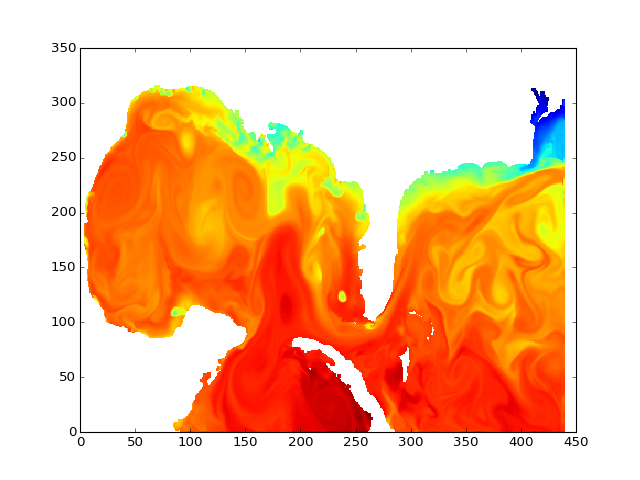

In [6]:
%matplotlib notebook

import iris.plot as iplt

cs = iplt.pcolormesh(c)